In [1]:
# EDA MOdule importing
import shutil

shutil.copy('/content/drive/MyDrive/DA_Library/EDA.py','EDA.py')

'EDA.py'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import EDA as eda

In [3]:
raw_data = eda.readfile('/content/drive/MyDrive/Ajinkya_Patil_Plant Disease Detection /Processed_data&models/Tomato/dataset_tomato.xlsx')

In [4]:
raw_data.dtypes

Unnamed: 0      int64
area          float64
perimeter     float64
red_mean      float64
green_mean    float64
blue_mean     float64
f1            float64
f2            float64
red_std       float64
green_std     float64
blue_std      float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
label           int64
dtype: object

In [5]:
raw_data.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [6]:
raw_data.columns

Index(['area', 'perimeter', 'red_mean', 'green_mean', 'blue_mean', 'f1', 'f2',
       'red_std', 'green_std', 'blue_std', 'f4', 'f5', 'f6', 'f7', 'f8',
       'label'],
      dtype='object')

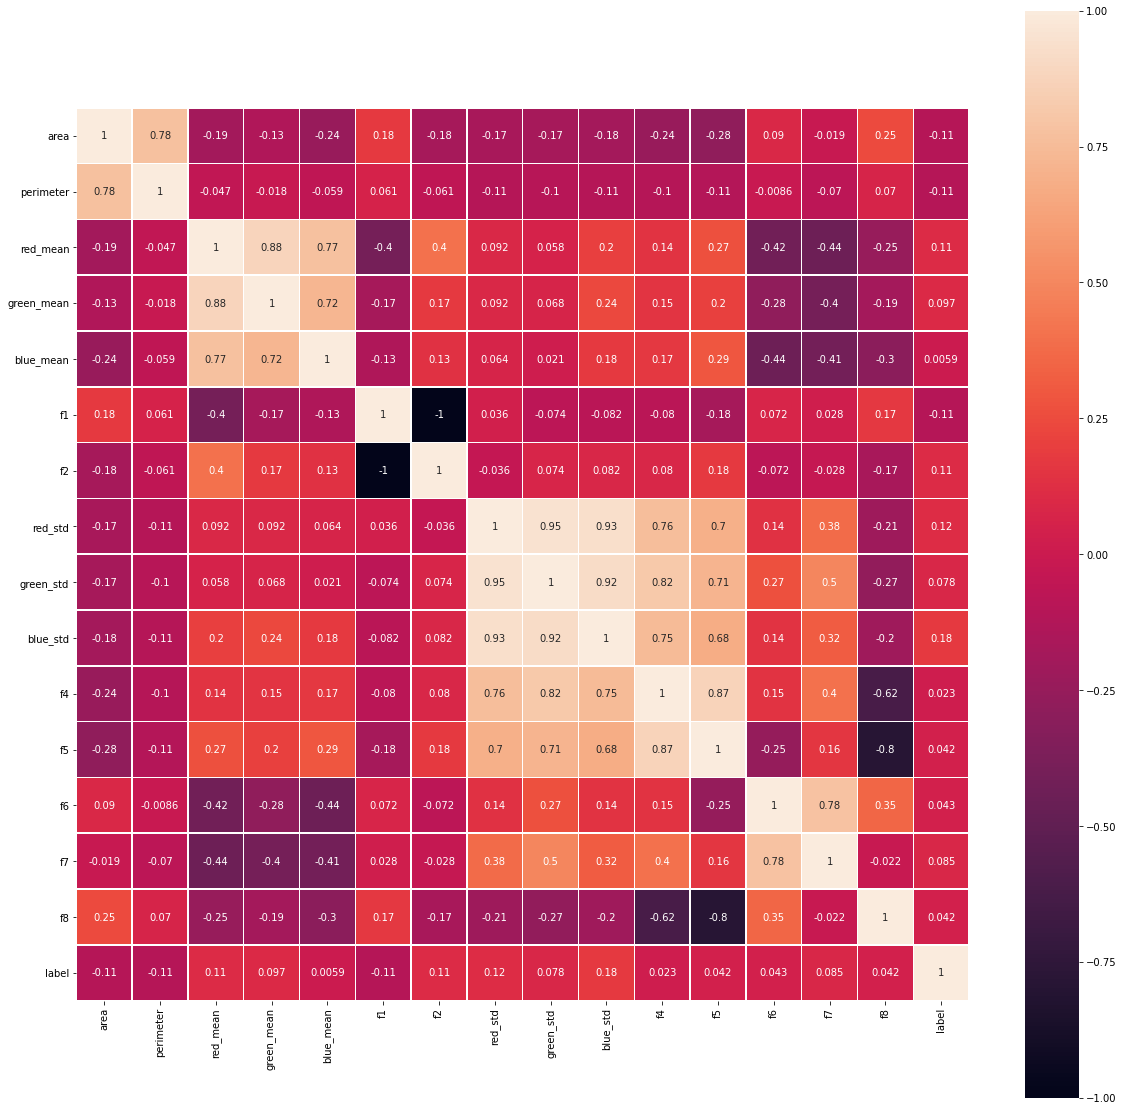

In [7]:
eda.correlation(raw_data)

In [8]:
eda.correlationlist(raw_data)

area
The Pearson Correlation Coefficient is -0.10825772581918129  with a P-value of P = 7.490960204903698e-49
True
------------------------------------------------------------------------------------------
perimeter
The Pearson Correlation Coefficient is -0.10881509999070951  with a P-value of P = 2.430360129993041e-49
True
------------------------------------------------------------------------------------------
red_mean
The Pearson Correlation Coefficient is 0.1071646963872605  with a P-value of P = 6.69618920598315e-48
True
------------------------------------------------------------------------------------------
green_mean
The Pearson Correlation Coefficient is 0.09695990553571793  with a P-value of P = 1.7222295543625968e-39
True
------------------------------------------------------------------------------------------
blue_mean
The Pearson Correlation Coefficient is 0.005937084418838071  with a P-value of P = 0.42182463736602094
False
---------------------------------------------

**Insights:**
Less correlated features are:
- green channel mean
- Blue channel mean
- green channel std
- f4
- f5
- f6
- f7
- f8

Also f1 and f2 are mutually relative So one of them can be removed

In [18]:
cleaned_data = raw_data.drop(['f1'],axis = 1, inplace=False)

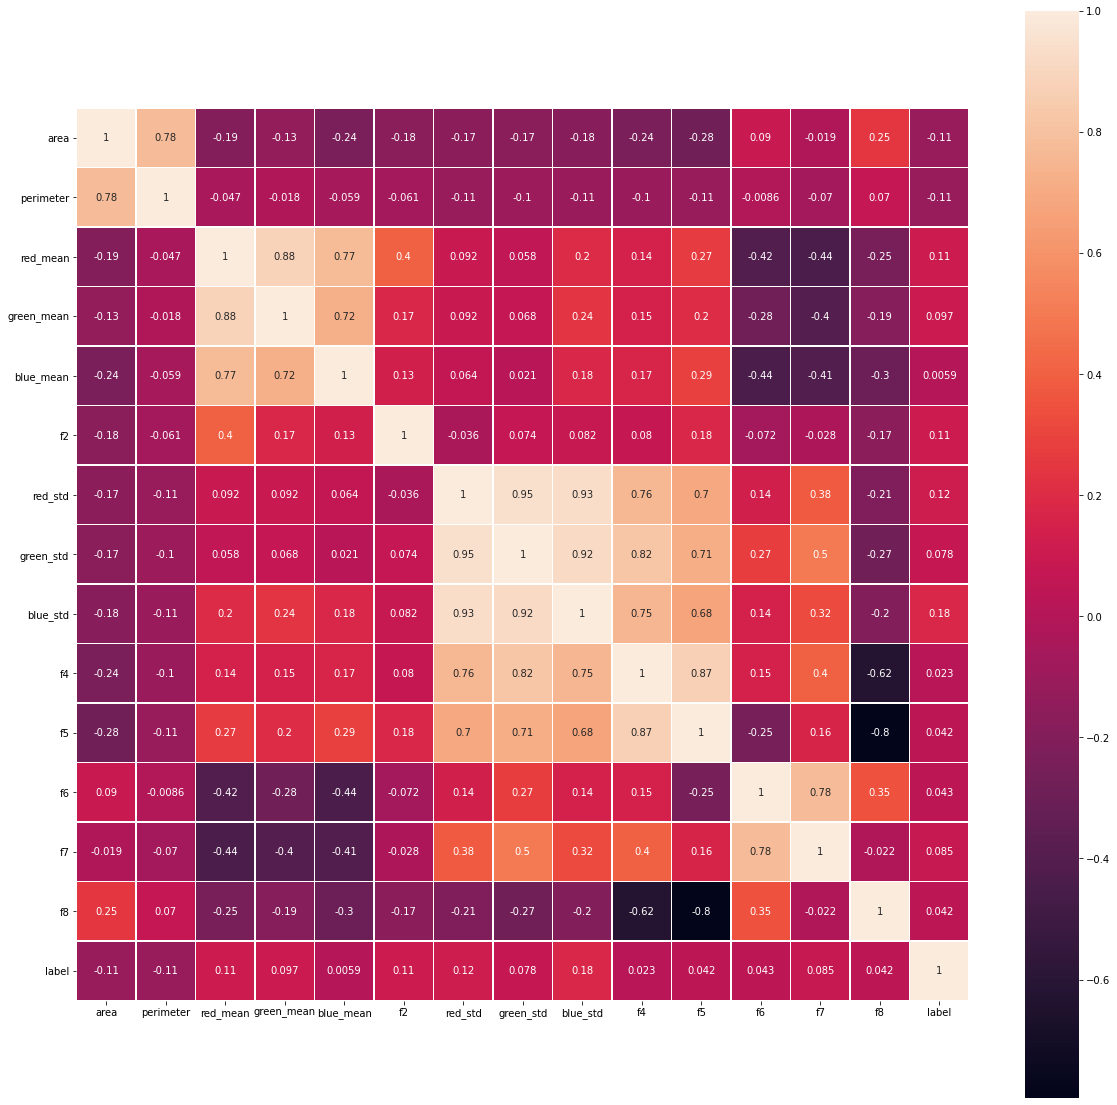

In [19]:
eda.correlation(cleaned_data)

In [20]:
cleaned_data = eda.removenullrows(cleaned_data)

In [21]:
raw_data.shape

(18307, 16)

In [22]:
cleaned_data.shape

(18307, 15)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold 


In [24]:
df = cleaned_data.reset_index()

In [25]:
X = df.drop(['index','label'],axis = 1, inplace=False)
y = df['label']
print(X.shape)
print(y.shape)

(18307, 14)
(18307,)


In [26]:
k = 5
kf = KFold(n_splits=k, random_state=9, shuffle = True)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
 
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)            # classification
    acc = accuracy_score(pred_values , y_test)     # Classification

    #acc = model.score(X_test,y_test)                # Regression
    
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('Score of each fold - {}'.format(acc_score))
print('Avg Score : {}'.format(avg_acc_score))

Score of each fold - [0.8735663571818678, 0.8582741671217914, 0.8626058453974323, 0.871073477192024, 0.8683419830647364]
Avg Score : 0.8667723659915705


# **K- fold Cross validation accuracy:**
# **0.8667723659915705**

# ROC Curve

In [27]:
!pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


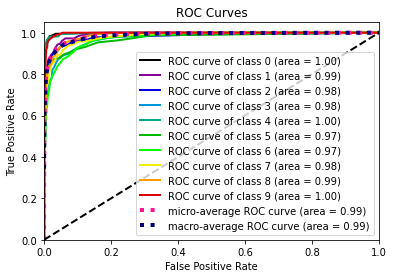

In [28]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)




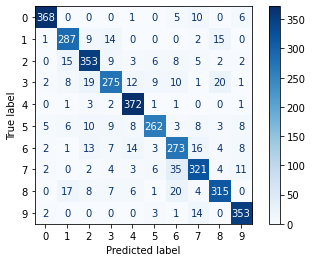

In [29]:
from sklearn.metrics import plot_confusion_matrix
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, values_format = 'd',cmap = 'Blues',display_labels = ['0','1','2','3','4','5','6','7','8','9'])

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, [0,1,2,3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       390
           1       0.86      0.88      0.87       328
           2       0.85      0.88      0.86       403
           3       0.84      0.77      0.80       357
           4       0.89      0.98      0.93       381
           5       0.90      0.81      0.85       322
           6       0.77      0.80      0.78       341
           7       0.84      0.83      0.83       388
           8       0.87      0.83      0.85       378
           9       0.91      0.95      0.93       373

    accuracy                           0.87      3661
   macro avg       0.87      0.87      0.87      3661
weighted avg       0.87      0.87      0.87      3661



# **F1 Score:**
# **0.87**

# Deployment

In [31]:
from sklearn.ensemble import RandomForestClassifier
lm = RandomForestClassifier(random_state = 50,n_estimators = 50,max_samples = 0.7)
lm.fit(X,y)
print('Training Score: ',lm.score(X,y))

Training Score:  0.9986344021412574


In [32]:
lm.feature_importances_

array([0.04785912, 0.03929277, 0.06332737, 0.06508964, 0.08277889,
       0.08437516, 0.06284013, 0.06877623, 0.09017819, 0.09530434,
       0.07147423, 0.07278253, 0.07329451, 0.0826269 ])

In [33]:
import pickle
filename = '/content/drive/MyDrive/Ajinkya_Patil_Plant Disease Detection /Processed_data&models/Tomato/Results/Tomatomodel_V1.sav'
pickle.dump(lm, open(filename, 'wb'))

In [35]:
filename = '/content/drive/MyDrive/Ajinkya_Patil_Plant Disease Detection /Processed_data&models/Tomato/Results/Tomatomodel_V1.sav'

dep_model = pickle.load(open(filename, 'rb'))

print(dep_model.score(X,y))

0.9986344021412574


# Selected Features

In [36]:
X.columns

Index(['area', 'perimeter', 'red_mean', 'green_mean', 'blue_mean', 'f2',
       'red_std', 'green_std', 'blue_std', 'f4', 'f5', 'f6', 'f7', 'f8'],
      dtype='object')

# Label Dictionary

- 0 : Tomato___healthy
- 1 : Tomato___Bacterial_spot
- 2 : Tomato___Early_blight
- 3 : Tomato___Late_blight
- 4 : Tomato___Leaf_Mold
- 5 : Tomato___Septoria_leaf_spot
- 6 : omato___Spider_mites Two-spotted_spider_mite
- 7 : Tomato___Target_Spot
- 8 : omato___Tomato_Yellow_Leaf_Curl_Virus
- 9 : Tomato___Tomato_mosaic_virus

# Performance
- Accuracy : 0.8668
- F1 score : 0.87